# 模型的改进
注意到前一个模型准确性下降，将使用数据增强来提高部署准确性

In [1]:
!sudo apt-get update

Get:1 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3632 B]
Get:2 https://dl.yarnpkg.com/debian stable InRelease [17.1 kB]                 
Get:3 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease [3961 B]
Get:4 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main all Packages [2714 B]
Get:5 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main amd64 Packages [295 kB]
Get:6 https://dl.yarnpkg.com/debian stable/main all Packages [11.8 kB]         
Get:7 https://dl.yarnpkg.com/debian stable/main amd64 Packages [11.8 kB]       
Get:8 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable/main amd64 Packages [4557 B]
Get:9 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]                
Get:10 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]     
Get:11 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease [28.0 kB] 
Get:12 http://security.ubuntu.com/ubuntu

In [2]:
!sudo apt-get install libusb-1.0-0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libusb-1.0-0
0 upgraded, 1 newly installed, 0 to remove and 26 not upgraded.
Need to get 46.5 kB of archives.
After this operation, 139 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libusb-1.0-0 amd64 2:1.0.23-2build1 [46.5 kB]
Fetched 46.5 kB in 1s (45.9 kB/s)       


Selecting previously unselected package libusb-1.0-0:amd64.
(Reading database ... 70090 files and directories currently installed.)
Preparing to unpack .../libusb-1.0-0_2%3a1.0.23-2build1_amd64.deb ...
Unpacking libusb-1.0-0:amd64 (2:1.0.23-2build1) ...
Setting up libusb-1.0-0:amd64 (2:1.0.23-2build1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.16) ...


In [3]:
!pip install tflite-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-datasets to determine which version is compatible with other requirements. This could take a while.
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
INFO: pip is looking at multiple versions of tensorflow-metadata to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at mult

In [4]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

print(tf.__version__)

2024-06-20 10:24:49.709662: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-20 10:24:49.709697: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.4


In [5]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a color dimension to the images in "train" and "validate" dataset to
# leverage Keras's data augmentation utilities later.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

11501568/11490434 [==============================] - 2s 0us/step


In [6]:
def create_model():
  model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [7]:
base_model = create_model()
base_model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

2024-06-20 10:25:02.250919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-20 10:25:02.250998: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-20 10:25:02.251025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-8ecb7b): /proc/driver/nvidia/version does not exist
2024-06-20 10:25:02.251313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5


2024-06-20 10:25:02.556910: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.9584

2024-06-20 10:25:48.773231: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 48s 26ms/step - loss: 0.1364 - accuracy: 0.9584 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0409 - val_accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0353 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0403 - val_accuracy: 0.9871


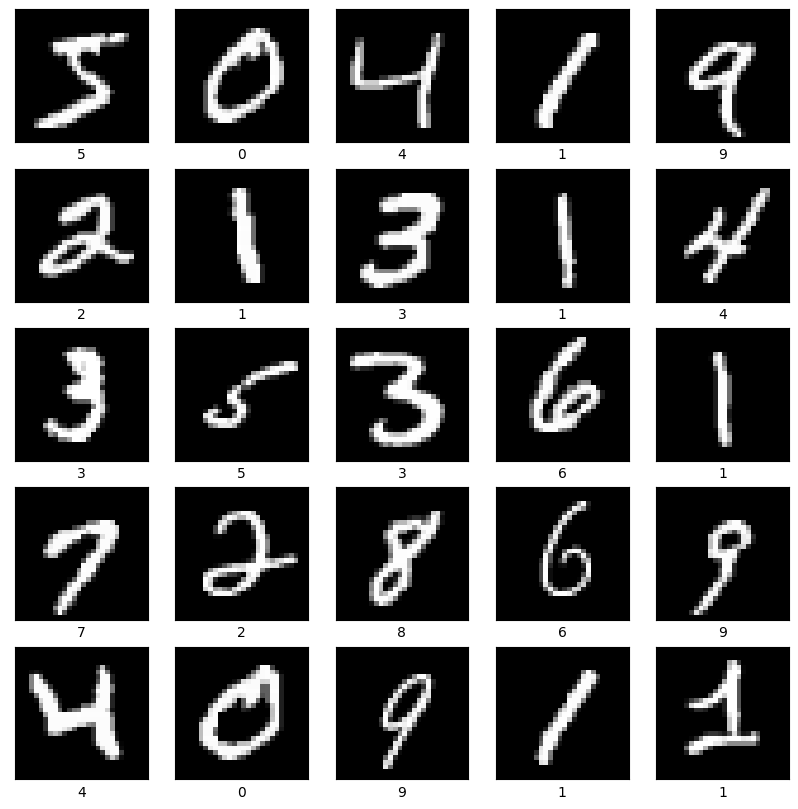

In [8]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(train_images[i], axis=2), cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

array([[<AxesSubplot:title={'center':'x_min'}>,
        <AxesSubplot:title={'center':'x_max'}>],
       [<AxesSubplot:title={'center':'y_min'}>,
        <AxesSubplot:title={'center':'y_max'}>]], dtype=object)

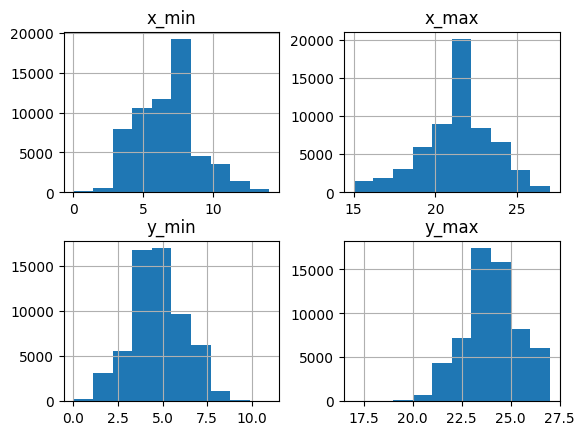

In [9]:
# An utility function that returns where the digit is in the image.
def digit_area(mnist_image):
  # Remove the color axes
  mnist_image = np.squeeze(mnist_image, axis=2)

  # Extract the list of columns that contain at least 1 pixel from the digit
  x_nonzero = np.nonzero(np.amax(mnist_image, 0))
  x_min = np.min(x_nonzero)
  x_max = np.max(x_nonzero)

  # Extract the list of rows that contain at least 1 pixel from the digit
  y_nonzero = np.nonzero(np.amax(mnist_image, 1))
  y_min = np.min(y_nonzero)
  y_max = np.max(y_nonzero)

  return [x_min, x_max, y_min, y_max]

# Calculate the area containing the digit across MNIST dataset
digit_area_rows = []
for image in train_images:
  digit_area_row = digit_area(image)
  digit_area_rows.append(digit_area_row)
digit_area_df = pd.DataFrame(
  digit_area_rows,
  columns=['x_min', 'x_max', 'y_min', 'y_max']
)
digit_area_df.hist()

可以发现数据集中的图像主要集中在图像中心的特定区域中。
因此需要对数据进行操作来扭曲数据集的位置

In [10]:
# Define data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.25,
  height_shift_range=0.25,
  shear_range=0.25,
  zoom_range=0.2
)

# Generate augmented data from MNIST dataset
train_generator = datagen.flow(train_images, train_labels)
test_generator = datagen.flow(test_images, test_labels)

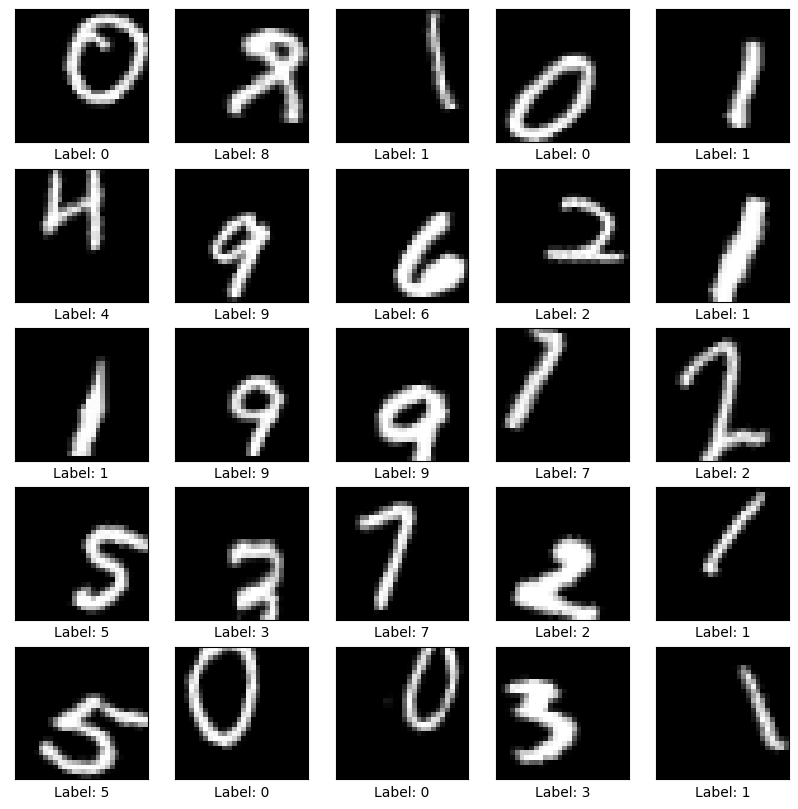

In [11]:
augmented_images, augmented_labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(augmented_images[i], axis=2), cmap=plt.cm.gray)
    plt.xlabel('Label: %d' % augmented_labels[i])
plt.show()

In [12]:
base_model.evaluate(test_generator)

  1/313 [..............................] - ETA: 29s - loss: 3.6035 - accuracy: 0.4062

313/313 [==============================] - 3s 9ms/step - loss: 5.3646 - accuracy: 0.3270


[5.364566326141357, 0.3269999921321869]

增强测试数据集中的准确率显著下降。
我们需要用增强的数据集来训练模型

In [13]:
improved_model = create_model()
improved_model.fit(train_generator, epochs=25, validation_data=test_generator)

Epoch 1/25


1875/1875 [==============================] - 52s 27ms/step - loss: 1.0024 - accuracy: 0.6758 - val_loss: 0.5460 - val_accuracy: 0.8354
Epoch 2/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.5040 - accuracy: 0.8478 - val_loss: 0.3707 - val_accuracy: 0.8908
Epoch 3/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3954 - accuracy: 0.8800 - val_loss: 0.3083 - val_accuracy: 0.9080
Epoch 4/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3489 - accuracy: 0.8951 - val_loss: 0.2821 - val_accuracy: 0.9145
Epoch 5/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3208 - accuracy: 0.9039 - val_loss: 0.2716 - val_accuracy: 0.9195
Epoch 6/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3047 - accuracy: 0.9089 - val_loss: 0.2316 - val_accuracy: 0.9284
Epoch 7/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2825 - accuracy: 0.9148 - val_loss: 0.2275 - val_accura

In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(improved_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()


f = open('mnist3.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

2024-06-20 10:57:30.783331: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpa24r3alo/assets


2024-06-20 10:57:31.330616: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2024-06-20 10:57:31.330652: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2024-06-20 10:57:31.331261: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpa24r3alo
2024-06-20 10:57:31.332754: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2024-06-20 10:57:31.332779: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpa24r3alo
2024-06-20 10:57:31.335914: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-06-20 10:57:31.366255: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpa24r3alo
2024-06-20 10:57:31.376073: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 44814 m